In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/My Drive/disease_new/autism_screening/autism_screening.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [5]:
df.duplicated().sum()

5

In [38]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         697 non-null    int64  
 1   A2_Score         697 non-null    int64  
 2   A3_Score         697 non-null    int64  
 3   A4_Score         697 non-null    int64  
 4   A5_Score         697 non-null    int64  
 5   A6_Score         697 non-null    int64  
 6   A7_Score         697 non-null    int64  
 7   A8_Score         697 non-null    int64  
 8   A9_Score         697 non-null    int64  
 9   A10_Score        697 non-null    int64  
 10  age              697 non-null    float64
 11  gender           697 non-null    object 
 12  ethnicity        697 non-null    object 
 13  jundice          697 non-null    object 
 14  austim           697 non-null    object 
 15  contry_of_res    697 non-null    object 
 16  used_app_before  697 non-null    object 
 17  result          

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = list(df.columns)
for col in cols:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         697 non-null    int64  
 1   A2_Score         697 non-null    int64  
 2   A3_Score         697 non-null    int64  
 3   A4_Score         697 non-null    int64  
 4   A5_Score         697 non-null    int64  
 5   A6_Score         697 non-null    int64  
 6   A7_Score         697 non-null    int64  
 7   A8_Score         697 non-null    int64  
 8   A9_Score         697 non-null    int64  
 9   A10_Score        697 non-null    int64  
 10  age              697 non-null    float64
 11  gender           697 non-null    int64  
 12  ethnicity        697 non-null    int64  
 13  jundice          697 non-null    int64  
 14  austim           697 non-null    int64  
 15  contry_of_res    697 non-null    int64  
 16  used_app_before  697 non-null    int64  
 17  result          

<Axes: >

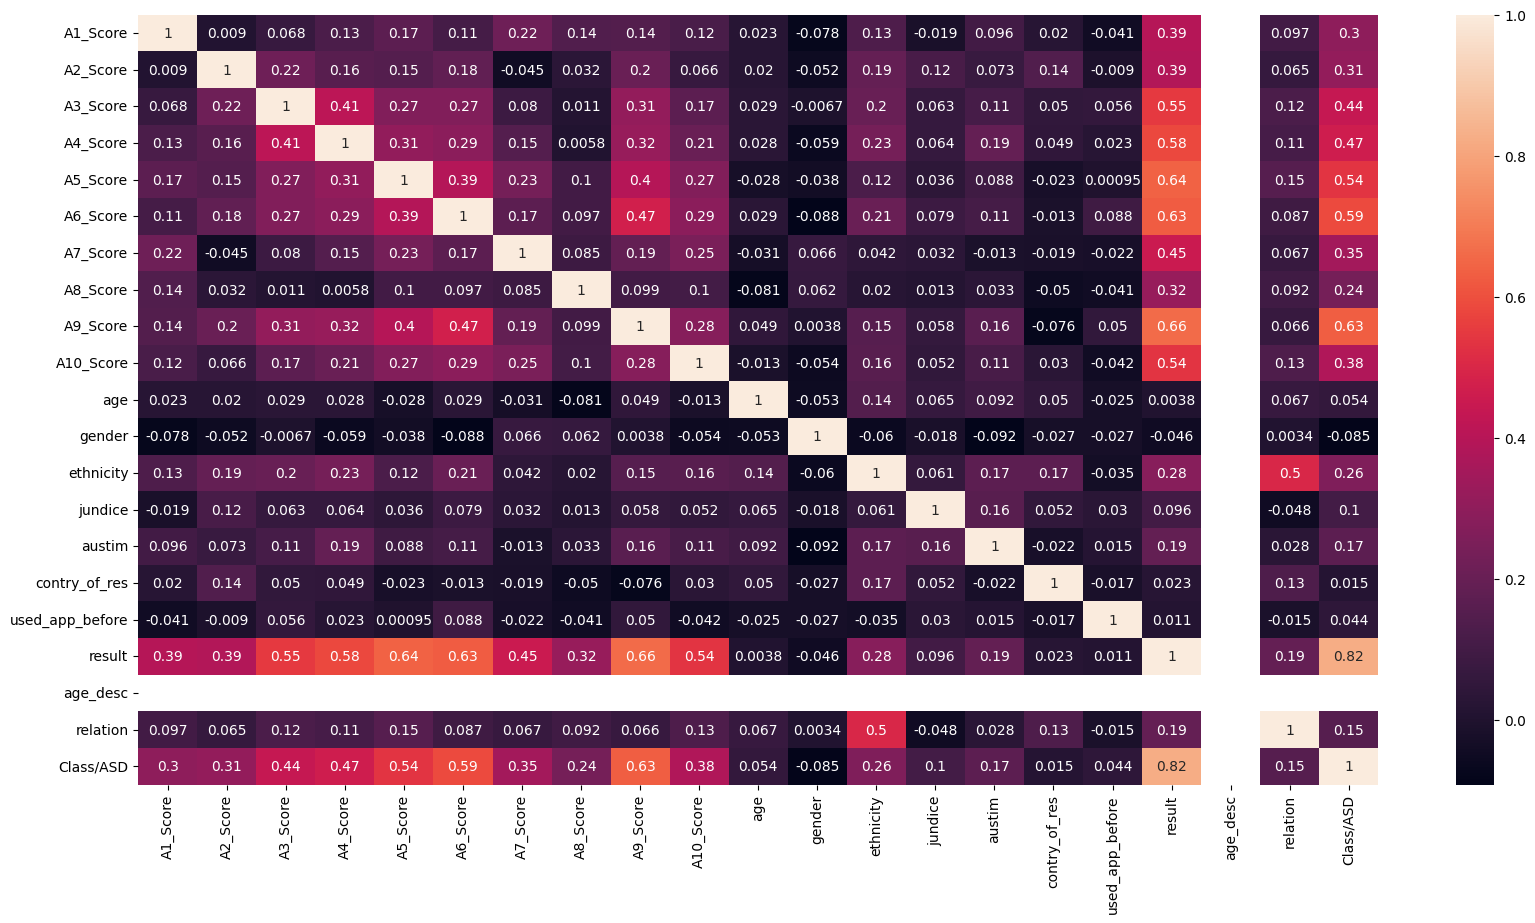

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         697 non-null    int64  
 1   A2_Score         697 non-null    int64  
 2   A3_Score         697 non-null    int64  
 3   A4_Score         697 non-null    int64  
 4   A5_Score         697 non-null    int64  
 5   A6_Score         697 non-null    int64  
 6   A7_Score         697 non-null    int64  
 7   A8_Score         697 non-null    int64  
 8   A9_Score         697 non-null    int64  
 9   A10_Score        697 non-null    int64  
 10  age              697 non-null    float64
 11  gender           697 non-null    int64  
 12  ethnicity        697 non-null    int64  
 13  jundice          697 non-null    int64  
 14  austim           697 non-null    int64  
 15  contry_of_res    697 non-null    int64  
 16  used_app_before  697 non-null    int64  
 17  result          

In [41]:
# Logistic Regression Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()

X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [43]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [44]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(557, 20) (557,) (140, 20) (140,)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Logreg = LogisticRegression()
logreg_model = Logreg.fit(X_train_scaled,y_train)
y_train_pred = logreg_model.predict(X_train_scaled)
y_test_pred = logreg_model.predict(X_test_scaled)
print(f'Train Accuracy: {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test,y_test_pred)}')

Train Accuracy: 1.0
Test Accuracy: 1.0


In [46]:
logistic_train_accuracy = accuracy_score(y_train, y_train_pred)
logistic_test_accuracy = accuracy_score(y_test, y_test_pred)

In [47]:
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
for i in cv_scores:
  print(i)
average_cv_score = cv_scores.mean()
print(f"Average cross-validation score: {average_cv_score:.2f}")

1.0
1.0
1.0
1.0
0.9784172661870504
Average cross-validation score: 1.00


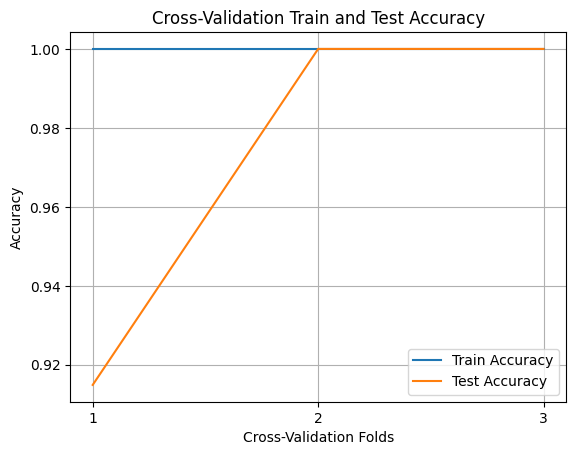

In [48]:
train_scores = cross_val_score(logreg_model, X_train, y_train, cv=3, scoring='accuracy')
test_scores = cross_val_score(logreg_model, X_test, y_test, cv=3, scoring='accuracy')

x_axis = list(range(len(train_scores)))

plt.plot(x_axis, train_scores, label='Train Accuracy')
plt.plot(x_axis, test_scores, label='Test Accuracy')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Train and Test Accuracy')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

max_depth = [5, 10, 15, 20, None]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rfc = RandomForestClassifier(random_state=23)
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                n_jobs=-1, scoring='accuracy', random_state=23,
                                cv=3, return_train_score=True)

rfc_random.fit(X_train, y_train)

rfc_train_accuracy = rfc_random.score(X_train, y_train)
rfc_test_accuracy = rfc_random.score(X_test, y_test)

print("Train Accuracy:", rfc_train_accuracy)
print("Test Accuracy:", rfc_test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


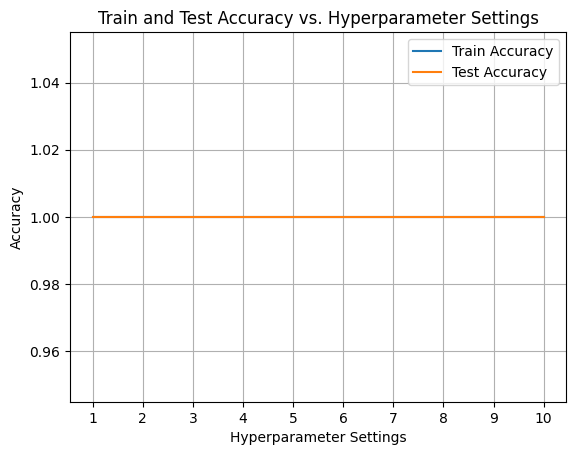

In [50]:
train_accuracy = rfc_random.cv_results_['mean_train_score']
test_accuracy = rfc_random.cv_results_['mean_test_score']

x_axis = list(range(len(train_accuracy)))

plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(i) for i in np.linspace(start=100, stop=3000, num=25)]
max_depth = [3, 5, 7]
learning_rate = [0.001, 0.01, 0.1, 0.2]
alpha_values = [0, 0.001, 0.01]
lambda_values = [0, 0.001, 0.01]
max_features = ['auto', 'sqrt']
xgbc = XGBClassifier(random_state=23, objective='binary:logistic')

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'alpha': alpha_values,
    'lambda': lambda_values
}

xgbc_random = RandomizedSearchCV(estimator=xgbc, param_distributions=random_grid,
                                 n_jobs=-1, scoring='accuracy', random_state=23,
                                 cv=5, return_train_score=True, error_score='raise')

xgbc_random.fit(X_train, y_train)

xgbc_train_accuracy = xgbc_random.score(X_train, y_train)
xgbc_test_accuracy = xgbc_random.score(X_test, y_test)

print("Train Accuracy:", xgbc_train_accuracy)
print("Test Accuracy:", xgbc_test_accuracy)

[12:01:03] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Train Accuracy: 1.0
Test Accuracy: 1.0


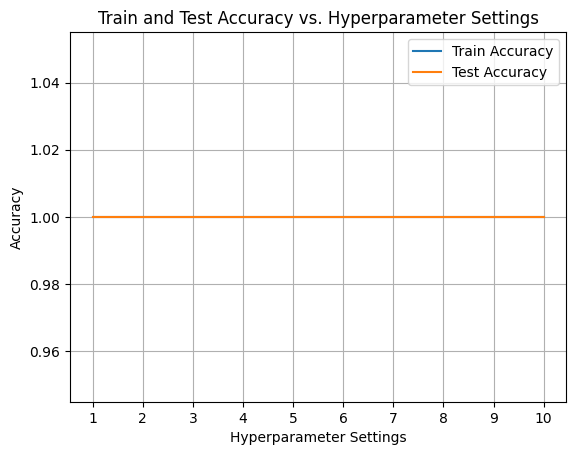

In [52]:
train_accuracy = xgbc_random.cv_results_['mean_train_score']
test_accuracy = xgbc_random.cv_results_['mean_test_score']

x_axis = list(range(len(train_accuracy)))

plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# AdaBoost Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [int(i) for i in np.linspace(start=120, stop=3000, num=20)]
learning_rate = [0.001, 0.01, 0.1, 0.2]
algorithm = ['SAMME', 'SAMME.R']
random_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'algorithm': algorithm}

adbc = AdaBoostClassifier(random_state=23)
adbc_random = RandomizedSearchCV(estimator=adbc, param_distributions=random_grid, n_jobs=-1, scoring='accuracy',
                                 random_state=23, cv=3, return_train_score=True)
adbc_random.fit(X_train, y_train)

y_train_pred = adbc_random.predict(X_train)
y_test_pred = adbc_random.predict(X_test)

adbc_train_accuracy = accuracy_score(y_train, y_train_pred)
adbc_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", adbc_train_accuracy)
print("Test Accuracy:", adbc_test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 1.0


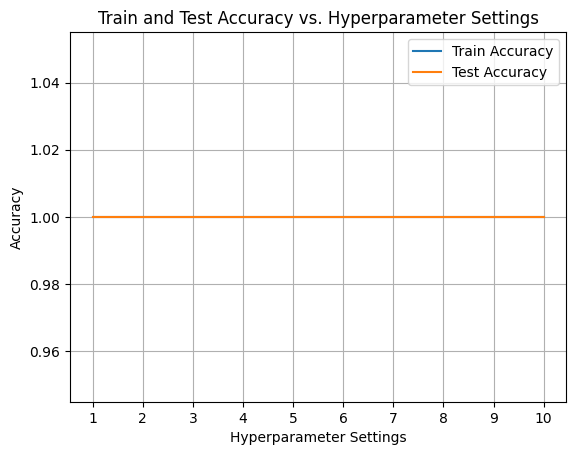

In [54]:
train_accuracy = adbc_random.cv_results_['mean_train_score']
test_accuracy = adbc_random.cv_results_['mean_test_score']

x_axis = np.arange(len(train_accuracy))
plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Error Rate')

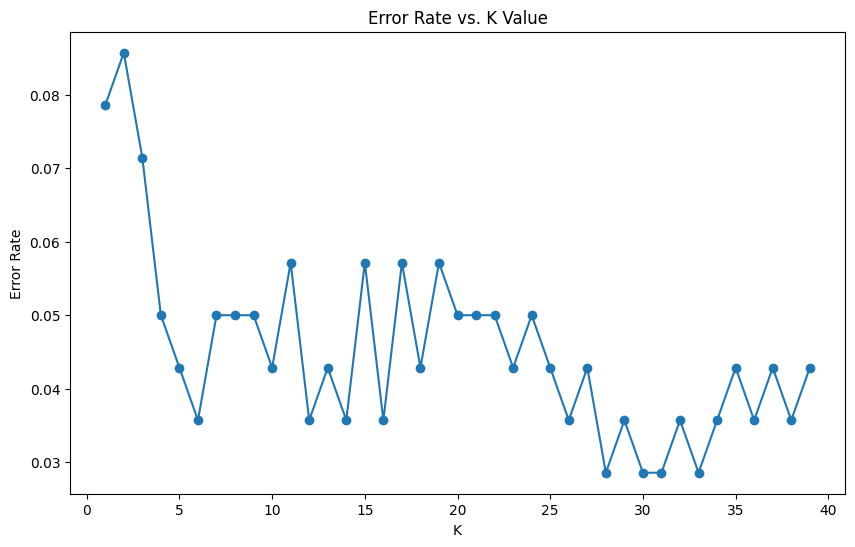

In [56]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
knn = KNeighborsClassifier(n_neighbors=13)
knn_model = knn.fit(X_train_scaled,y_train)
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_accuracy)

Train Accuracy: 0.9748653500897666
Test Accuracy: 0.9571428571428572


In [60]:
# SVM Classifier
from sklearn.svm import SVC
random_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc = SVC(random_state=23,probability=True)
grid = RandomizedSearchCV(svc, random_grid, refit = True, verbose = 3, cv = 3)
svc2 = grid.fit(X_train_scaled,y_train)
y_train_pred = svc2.predict(X_train_scaled)
y_test_pred = svc2.predict(X_test_scaled)

svc_train_accuracy = accuracy_score(y_train, y_train_pred)
svc_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", svc_train_accuracy)
print("Test Accuracy:", svc_test_accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.968 total time=   0.1s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.995 total time=   0.1s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.978 total time=   0.1s
[CV 1/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.737 total time=   0.1s
[CV 2/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.737 total time=   0.1s
[CV 3/3] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.735 total time=   0.1s
[CV 1/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.1s
[CV 2/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.1s
[CV 3/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.1s
[CV 1/3] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.1s
[CV 2/3] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/3] END .....C=100, gamma=0.01, kernel=rbf;

In [62]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost', 'SVC', 'KNN']
test_accuracies = [logistic_test_accuracy, rfc_test_accuracy, xgbc_test_accuracy,
                   adbc_test_accuracy, svc_test_accuracy, knn_test_accuracy]

accuracy_df = pd.DataFrame({'Model': model_names, 'Test Accuracy': test_accuracies})

accuracy_df = accuracy_df.sort_values(by='Test Accuracy', ascending=False)

print(accuracy_df)

                 Model  Test Accuracy
0  Logistic Regression       1.000000
1        Random Forest       1.000000
2              XGBoost       1.000000
3             AdaBoost       1.000000
4                  SVC       1.000000
5                  KNN       0.957143


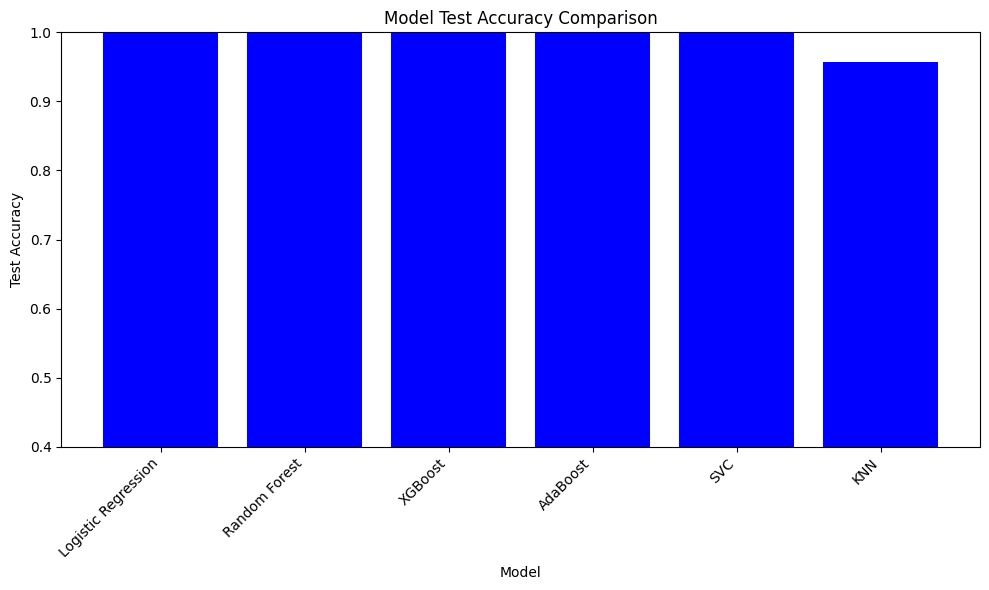

In [63]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost', 'SVC', 'KNN']
test_accuracies = [logistic_test_accuracy, rfc_test_accuracy, xgbc_test_accuracy,
                   adbc_test_accuracy, svc_test_accuracy, knn_test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Test Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.4, 1.0)
plt.tight_layout()

plt.show()

Random Forest is performing the best when compared to all the other models and hence we are selecting the XGBoost classifier as our final model for deployment

In [64]:
import joblib

best_rfc_model = rfc_random.best_estimator_
model_filename = '/content/drive/My Drive/disease_new/autism_screening/model/rfc_model.pkl'
joblib.dump(best_rfc_model, model_filename)
print("Best rfc Classifier model saved successfully.")

Best rfc Classifier model saved successfully.


In [67]:
model_filename = '/content/drive/My Drive/disease_new/autism_screening/model/rfc_model.pkl'
loaded_model = joblib.load(model_filename)

In [75]:
num_samples = 10
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)
random_samples = X_test.iloc[random_indices]
actual_labels = y_test.iloc[random_indices]

In [76]:
predicted_labels = loaded_model.predict(random_samples)

In [77]:
for i in range(num_samples):
    actual_label = actual_labels.iloc[i]
    predicted_label = predicted_labels[i]
    print(f"Sample {i+1}: Actual={actual_label}, Predicted={predicted_label}")

Sample 1: Actual=0, Predicted=0
Sample 2: Actual=1, Predicted=1
Sample 3: Actual=0, Predicted=0
Sample 4: Actual=0, Predicted=0
Sample 5: Actual=1, Predicted=1
Sample 6: Actual=0, Predicted=0
Sample 7: Actual=0, Predicted=0
Sample 8: Actual=0, Predicted=0
Sample 9: Actual=1, Predicted=1
Sample 10: Actual=0, Predicted=0
